## Scatterplot: count versus grit (Well average)

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
BaseDir = './results/'

In [9]:
# Load viabilty data
dfViability = pd.read_csv("{}/viability_scores.csv".format(BaseDir), sep=";", index_col=0)
dfViability["perturbation"] = dfViability["Metadata_cmpd"] + "_" + dfViability.index.astype(str)
dfViability.head(2)

,Count_nuclei,ObjectNumber_cells,ObjectNumber_nuclei,AreaOccupied_AreaOccupied_cells,Metadata_layout_id,Metadata_well_id,Metadata_batch_id,Metadata_solvent,Metadata_stock_conc,Metadata_stock_conc_unit,...,Metadata_batchid,Metadata_cbkid,Metadata_libid,Metadata_libtxt,Metadata_smiles,Metadata_inchi,Metadata_inkey,Metadata_cmpd,Metadata_plate_well,perturbation
0,71.940079,70.045998,82.824240,72.489899,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,PHB000015,dmso,10.0,mM,...,PHB000015,[tetr],[tetr],pharmb_io,NaN,NaN,NaN,[tetr],colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02,[tetr]_0
1,121.929938,116.844406,118.061174,113.957071,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B04,BJ1827053,dmso,0.1,mM,...,BJ1827053,regorafenib,CBK278025,KDex_known_kinase_inhibitors,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(c3)C(F)(F...,InChI=1S/C21H15ClF4N4O3/c1-27-19(31)18-10-13(6...,FNHKPVJBJVTLMP-UHFFFAOYSA-N,regora,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B04,regora_1


In [12]:
# Load Grit data
dfGrit= pd.read_csv("{}/grit_scores.csv".format(BaseDir), sep=";", index_col=0)
dfGrit = dfGrit[dfGrit['Metadata_cmpd'] != '[dmso]']
dfGrit.head(2)

,perturbation,group,grit,Metadata_cmpd,Metadata_cmpd_conc
0,5-Fluo_136,0.333,0.247781,5-Fluo,0.333
1,5-Fluo_147,0.100,-0.129125,5-Fluo,0.100


In [10]:
# Remove non-data features from the list
ListOfMetadata = list(dfViability.columns[dfViability.columns.str.contains("Metadata_")])
ListOfMetadata.append('perturbation')


In [31]:
df = dfViability.merge(dfGrit, on=['Metadata_cmpd_conc', 'Metadata_cmpd','perturbation'], how='outer')
df.head(5)

,Count_nuclei,ObjectNumber_cells,ObjectNumber_nuclei,AreaOccupied_AreaOccupied_cells,Metadata_layout_id,Metadata_well_id,Metadata_batch_id,Metadata_solvent,Metadata_stock_conc,Metadata_stock_conc_unit,...,Metadata_libid,Metadata_libtxt,Metadata_smiles,Metadata_inchi,Metadata_inkey,Metadata_cmpd,Metadata_plate_well,perturbation,group,grit
0,71.940079,70.045998,82.824240,72.489899,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,PHB000015,dmso,10.0,mM,...,[tetr],pharmb_io,NaN,NaN,NaN,[tetr],colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02,[tetr]_0,2.50000,0.950366
1,121.929938,116.844406,118.061174,113.957071,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B04,BJ1827053,dmso,0.1,mM,...,CBK278025,KDex_known_kinase_inhibitors,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(c3)C(F)(F...,InChI=1S/C21H15ClF4N4O3/c1-27-19(31)18-10-13(6...,FNHKPVJBJVTLMP-UHFFFAOYSA-N,regora,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B04,regora_1,0.00833,0.053967
2,83.410840,81.770869,86.871254,89.960494,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B06,BJ1897191,dmso,0.1,mM,...,CBK303945,SLL_repurposing_set_SPECS,OC1(CN(C1)C(=O)c1ccc(F)c(F)c1Nc1ccc(I)cc1F)C1C...,InChI=1S/C21H21F3IN3O2/c22-14-6-5-13(19(18(14)...,BSMCAPRUBJMWDF-UHFFFAOYSA-N,cobime,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B06,cobime_3,0.10000,0.389215
3,114.627949,113.142480,122.614065,117.128077,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B07,BJ1898886,dmso,0.1,mM,...,CBK309486,SLL_repurposing_set_SPECS,COC(=O)N[C@@H](C)CNc1nccc(n1)-c1cn(nc1-c1cc(Cl...,InChI=1S/C22H27ClFN7O4S/c1-12(2)31-11-16(17-6-...,CMJCXYNUCSMDBY-ZDUSSCGKSA-N,Encora,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B07,Encora_4,0.10000,-0.292291
4,100.829403,97.842029,98.523864,111.142064,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B08,BA1001160,dmso,1.0,mM,...,CBK201051,Prestwick Chemical Library,Cn1nnc2c(ncn2c1=O)C(N)=O,InChI=1S/C6H6N6O2/c1-11-6(14)12-2-8-3(4(7)13)5...,BPEGJWRSRHCHSN-UHFFFAOYSA-N,Temozo,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B08,Temozo_5,1.00000,0.341675


#### TODO
1) normalize count_nuclei and object_count_number by DMSO
2) generate the scatterplots 
3) color-code by concentration 

In [39]:
# df = df[df['Metadata_cmpd_conc'] != 10]
df = df[df['Metadata_cmpd_conc'] != 2.5]

In [42]:
def pDose(x):
    '''This is just a helper function, to compute easily log transformed concentrations used in drug discovery'''
    return(-np.log10(1e-6*x))

In [77]:
ListOflabels = list(df['Metadata_cmpd_conc'].unique().astype(str))
ListOflabels.sort()

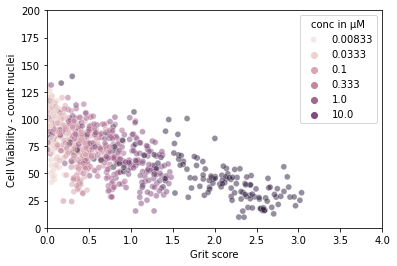

In [79]:
sns.scatterplot(x=df['grit'], y=df['Count_nuclei'], hue=10 - pDose(df['Metadata_cmpd_conc']), alpha=0.5)
plt.xlim([0, 4])
plt.ylim([0, 200])
plt.xlabel('Grit score')
plt.ylabel('Cell Viability - count nuclei')

plt.legend(title ='conc in µM', labels=ListOflabels)

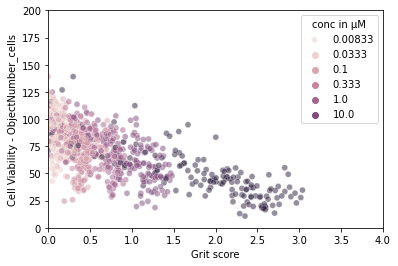

In [83]:
sns.scatterplot(x=df['grit'], y=df['ObjectNumber_cells'], hue=10 - pDose(df['Metadata_cmpd_conc']), alpha=0.5)
plt.xlim([0, 4])
plt.ylim([0, 200])
plt.xlabel('Grit score')
plt.ylabel('Cell Viability - ObjectNumber_cells')

plt.legend(title ='conc in µM', labels=ListOflabels)

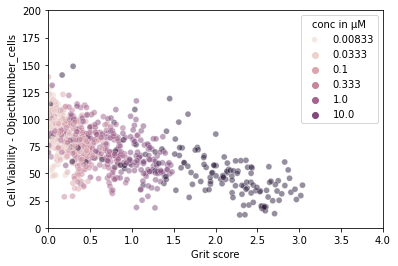

In [84]:
sns.scatterplot(x=df['grit'], y=df['ObjectNumber_nuclei'], hue=10 - pDose(df['Metadata_cmpd_conc']), alpha=0.5)
plt.xlim([0, 4])
plt.ylim([0, 200])
plt.xlabel('Grit score')
plt.ylabel('Cell Viability - ObjectNumber_cells')

plt.legend(title ='conc in µM', labels=ListOflabels)

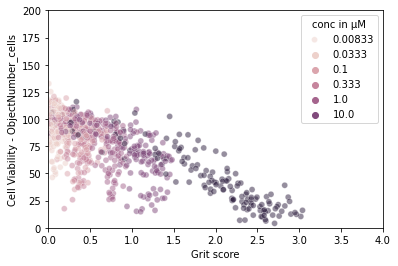

In [85]:
sns.scatterplot(x=df['grit'], y=df['AreaOccupied_AreaOccupied_cells'], hue=10 - pDose(df['Metadata_cmpd_conc']), alpha=0.5)
plt.xlim([0, 4])
plt.ylim([0, 200])
plt.xlabel('Grit score')
plt.ylabel('Cell Viability - ObjectNumber_cells')

plt.legend(title ='conc in µM', labels=ListOflabels)

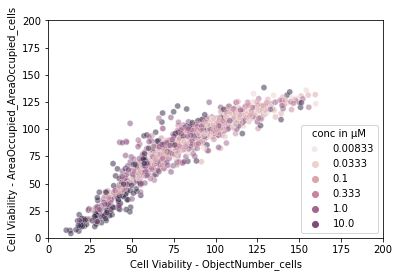

In [81]:
sns.scatterplot(x=df['ObjectNumber_cells'], y=df['AreaOccupied_AreaOccupied_cells'], hue=10 - pDose(df['Metadata_cmpd_conc']), alpha=0.5)
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.xlabel('Cell Viability - ObjectNumber_cells')
plt.ylabel('Cell Viability - AreaOccupied_AreaOccupied_cells')

plt.legend(title ='conc in µM', labels=ListOflabels)

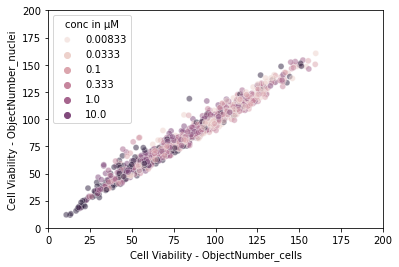

In [82]:
sns.scatterplot(x=df['ObjectNumber_cells'], y=df['ObjectNumber_nuclei'], hue=10 - pDose(df['Metadata_cmpd_conc']), alpha=0.5)
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.xlabel('Cell Viability - ObjectNumber_cells')
plt.ylabel('Cell Viability - ObjectNumber_nuclei')

plt.legend(title ='conc in µM', labels=ListOflabels)